In [19]:
import numpy as np
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import wandb

In [36]:
# function to prepare dataset
def prepare_dataset():
    
    print("Downloading Fashion MNIST dataset:", end=" ")
    (x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
    print("done")

    print("Samples in training data:\t", x_train.shape[0])
    print("Samples in testing data:\t", x_test.shape[0])
    label_dict = {
        0: 	"T-shirt/top",
        1: 	"Trouser",
        2: 	"Pullover",
        3: 	"Dress",
        4: 	"Coat",
        5: 	"Sandal",
        6: 	"Shirt",
        7: 	"Sneaker",
        8: 	"Bag",
        9: 	"Ankle boot "
    }
    print("Encoding of labels", label_dict)
    
    print("Reshaping images:", end=" ")
    x_train = x_train.reshape(x_train.shape[0], -1)
    x_test = x_test.reshape(x_test.shape[0], -1)
    print("done")

    print("Performing one hot encoding:", end=" ")
    y_train_enc = np.zeros((y_train.shape[0], 10))
    y_test_enc = np.zeros((y_test.shape[0], 10))
    print("done")

    for idx, lbl in enumerate(y_train):
        y_train_enc[idx][lbl] = 1
        
    for idx, lbl in enumerate(y_test):
        y_test_enc[idx][lbl] = 1 

    print("Dataset Prepared")
    return x_train, y_train, y_train_enc, x_test, y_test, y_test_enc, label_dict

In [73]:
def plot_and_log_images(X, y, label_dict, use_wandb=False):
    if use_wandb:
        wandb.init(project="cs6910-assignment-1", entity="me19b110", name="images log")

    images = []
    labels = []
    for i in range(10):
        images.append(X[np.where(y==i)[0][0]].reshape((28, 28)))
        labels.append(label_dict[i])
    
    fig, ax = plt.subplots(4, 3, figsize=(10,10))
    print("Sample images from training dataset")
    for idx in range(10):
        ax[int(idx/3), idx%3].imshow(images[idx], cmap="gray", vmin="0", vmax="255")
        ax[int(idx/3), idx%3].set_title(labels[idx])
        ax[int(idx/3), idx%3].axis('off')
    
    fig.delaxes(ax[3,1])
    fig.delaxes(ax[3,2])


    if use_wandb:
        wandb.log({"Image Samples": [wandb.Image(img, caption=lbl) for img, lbl in zip(images, labels)]})
        wandb.finish()

In [51]:
x_train, y_train, y_train_enc, x_test, y_test, y_test_enc, label_dict = prepare_dataset()

Samples in training data:	 60000
Samples in testing data:	 10000
Encoding of labels {0: 'T-shirt/top', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat', 5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Ankle boot '}
Reshaping images: done
Performing one hot encoding: done
Dataset Prepared


wandb: Currently logged in as: me19b110. Use `wandb login --relogin` to force relogin


Sample images from training dataset


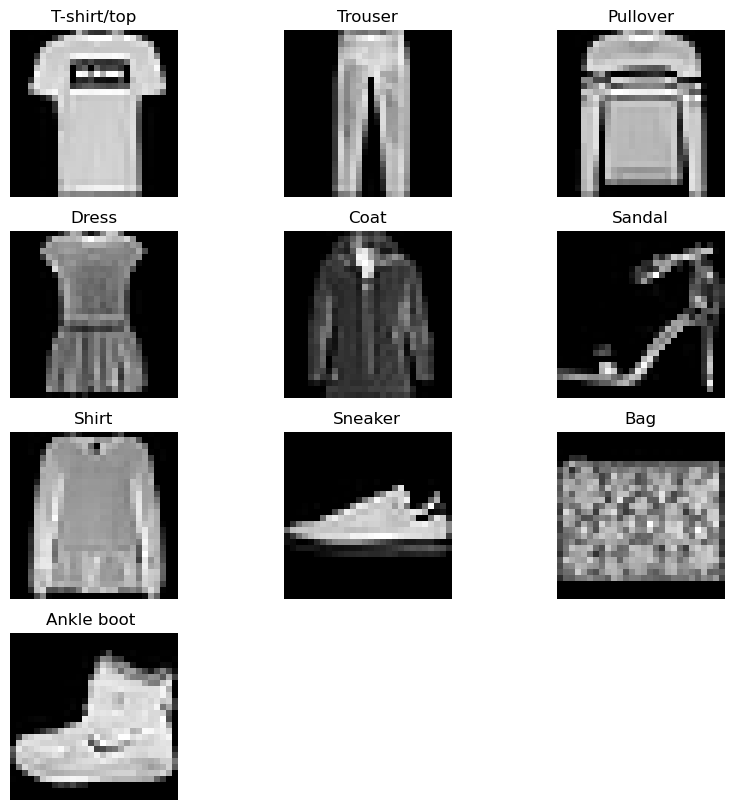

In [75]:
plot_and_log_images(x_train, y_train, label_dict, use_wandb=False)